# CSII 2024 Exercise 02: Diagonalization, Modal Analysis, Controllability and Observability

Welcome to the third CS2 notebook! In the last notebook we introduced two models, the _aircraft model_ and the _CS2 Bot_. In this notebook we will futher invesigate the aircraftmodel. The objectives are:

1) Use diagonalization to compute the modal decomposition of the aircraft model,
2) Visualize the different modes of the system,
3) Show if the model is controllable and/or observable.

To start, run the following cell to install the necessary modules and import the libraries.

In [16]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt


np.set_printoptions(suppress=True, precision=3)

## Exercise 1: Modal Decomposition of the Aircraft Model

To perform the modal decomposition of the System we need to find a coordinate transformation $\tilde{x} = T^{-1} x$, that diagonalizes the A-matrix of the state-space model.

$$
\begin{cases}
\dot{x} &= Ax + Bu, \\
y &= Cx + Du.
\end{cases}
\quad \Rightarrow \quad
\begin{cases}
T\dot{x} &= AT\tilde{x} + Bu, \\
y &= CT\tilde{x} + Du.
\end{cases}
$$

If we multiply the equations by $T^{-1}$ we find a definition for the state-space model in modal coordinates:

$$
\begin{align}
\dot{\tilde{x}} &= (T^{-1}AT)\tilde{x} + (T^{-1}B)u \\
y &= (CT)\tilde{x} + Du
\end{align}
$$

And we can define the new matrices as follows: 
$\quad \tilde{A} = T^{-1}AT, \quad \tilde{B} = T^{-1}B, \quad\tilde{C} = CT, \quad \tilde{D} = D$

Remember that this coordinate transform does not change the structural properties of the system and the time response is exactly the same!

### 1.1 Define Aircraft Model
For this exercise we use the aircraft model intruduced in the __Introductory Notebook 2__. Feel free to look at this notebook again if you need to. Run the next cell to define the longitudinal dynamics of the aircraft.

In [14]:
# Given matrices A and B
A = np.array([
    [-15.5801,  4.7122, -38.7221,  0.0000],
    [ -0.5257, -0.0166,   2.3501, -9.7847],
    [  4.4044, -1.5325, -18.1615, -0.7044],
    [  0.9974,  0.0000,   0.0000,  0.0000]
])

B = np.array([
    [-421.2001],
    [   1.3231],
    [ -17.3812],
    [   0.0000]
])

# Define the output matrix C and the feedthrough matrix D
C = np.array([0, 0, 0, 1])
D = 0

# Create a state-space system using the matrices A, B, C, and D
sys = ct.ss(A, B, C, D)

### 1.2 Diagonalization of the A-Matrix

To diagonalize the A-matrx we can perfom following transformation: $\tilde{x} = Vx, \quad \tilde{A} =\Lambda = V^{-1}AV$, where $V$ is the matrix containing the eigenvectors of $A$ as columns and $\Lambda = diag(\lambda_1, ..., \lambda_n)$ with the eigenvalues $\lambda_i$ of A.

Try to implement the function below that calculates the eigenvalues and the eigenvectors of a matrix. <br>
__Hints:__
1) Use `np.linalg.eig()` to compute the eigenvalues and eigenvectors.
2) Use `np.linalg.inv()` to compute the inverse of a matrix.
3) Matrix mulpiplication in python is done with `A @ B`.



In [5]:
def diagonalize_system(A: np.array, B: np.array, C: np.array, D:np.array) -> (np.array, np.array, np.array, np.array):
    """
    Diagonalizes a linear time-invariant system represented by its state-space matrices.

    Parameters:
    A (np.array): State matrix of the system.
    B (np.array): Input matrix of the system.
    C (np.array): Output matrix of the system.
    D (np.array): Feedthrough matrix of the system.

    Returns:
    A_tilde (np.array): Diagonalized state matrix.
    B_tilde (np.array): Diagonalized input matrix.
    C_tilde (np.array): Diagonalized output matrix.
    D_tilde (np.array): Diagonalized feedthrough matrix.
    """
    
    # TODO: replace the next line with your implementation
    eigenvalues, eigenvectors = None
    
    # Compute the transformed state-space representation
    # TODO: replace the next line with your implementation
    A_tilde = None
    B_tilde = None
    C_tilde = None
    D_tilde = None
    
    return A_tilde, B_tilde, C_tilde, D_tilde

In [6]:
def sol_diagonalize_system(A: np.array, B: np.array, C: np.array, D:np.array) -> (np.array, np.array, np.array, np.array):
    """
    Diagonalizes a linear time-invariant system represented by its state-space matrices.

    Parameters:
    A (np.array): State matrix of the system.
    B (np.array): Input matrix of the system.
    C (np.array): Output matrix of the system.
    D (np.array): Feedthrough matrix of the system.

    Returns:
    A_tilde (np.array): Diagonalized state matrix.
    B_tilde (np.array): Diagonalized input matrix.
    C_tilde (np.array): Diagonalized output matrix.
    D_tilde (np.array): Diagonalized feedthrough matrix.
    """
    
    # Compute the eigenvalues and eigenvectors of matrix A
    eigenvalues, eigenvectors = np.linalg.eig(A)

    # Compute the transformed state-space representation
    # The diagonal matrix A_tilde contains the eigenvalues of A
    A_tilde = np.diag(eigenvalues)
    
    # The input matrix B_tilde is obtained by transforming the input matrix B
    # using the inverse of the eigenvector matrix
    B_tilde = np.linalg.inv(eigenvectors) @ B
    
    # The output matrix C_tilde is obtained by transforming the output matrix C
    # using the eigenvector matrix
    C_tilde = C @ eigenvectors
    
    # The feedthrough matrix D_tilde remains the same
    D_tilde = D
    
    return A_tilde, B_tilde, C_tilde, D_tilde

You can run the following cell to test your implementation:

In [ ]:
def print_diagonalized_system(A_tilde, B_tilde, C_tilde, D_tilde):
    print("A_tilde =")
    print(np.around(A_tilde, decimals=2))
    print("B_tilde =")
    print(np.around(B_tilde, decimals=2))
    print("C_tilde =")
    print(np.around(C_tilde, decimals=2))
    print("D_tilde =")
    print(np.around(D_tilde, decimals=2))

print_diagonalized_system(*diagonalize_system(A, B, C, D))

## Exercise 2: Modal Analysis

In this exercise, we aim to analyze and visualize the modes of the aircraft model. This involves examining the relationship between each eigenvalue of the system and its corresponding eigenvector, which satisfies the equation $Av_i = \lambda_i v_i$. Each eigenvector represents the configuration of a mode within the system.

Looking again at the eigenvalues of matrix $A$, we find four eigenvalues: $\lambda_{sp} = -16.8739 \pm 13.1129j$ and $\lambda_{ph} = -0.0052 \pm 1.7644j$. It's important to note that these represent two complex-conjugate pairs of eigenvalues (and thus, eigenvectors), indicating just two distinct modes in the system. In aviation, these are referred to as the **Short Period** mode and the **Phugoid** mode.

The eigenvalue tells us how the amplitude of the mode changes over time, according to $\tilde{x}_i(t) = e^{\lambda_it}\tilde{x}_i(0)$. From this, we understand that the Short Period mode fades away quickly, while the Phugoid mode lasts longer and is more visible in the system's behavior. And since both eigenvalues are complex we expect oscillations to occur.

### 2.1 Short Period Mode
The Short Period mode is a key oscillatory behavior of an aircraft, mainly affecting its pitch motion. This mode has a high frequency and low damping, typically seen in response to changes in pitch control inputs and angle of attack. It is one of the two main longitudinal motion modes, the other being the Phugoid mode, which is characterized by lower frequency and higher damping. The Short Period mode is crucial for assessing the aircraft's agility.

In the Short Period mode, the aircraft experiences fast oscillations in pitch, or rotation around the lateral axis. This behavior is controlled by both inertia and aerodynamic forces, making it essential for evaluating the aircraft's stability and responsiveness to control inputs.

#### Analyzing the Short Period Mode
To investigate the Short Period mode, we look at the eigenvalues and eigenvectors of the system matrix $A$. The eigenvalues give us insight into the stability and dynamics of the mode, while the eigenvectors show us the mode's shape in the state space.

In [17]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvectors)

[[-0.946+0.j    -0.946-0.j     0.297-0.032j  0.297+0.032j]
 [ 0.011-0.02j   0.011+0.02j   0.939+0.j     0.939-0.j   ]
 [-0.03 +0.318j -0.03 -0.318j -0.007-0.001j -0.007+0.001j]
 [ 0.035+0.027j  0.035-0.027j -0.019-0.168j -0.019+0.168j]]


We start by setting the initial condition $x_0$ for our simulation to align with the real part of the eigenvector linked to the eigenvalue of the Short Period mode. Given the linear nature of our system, utilizing this initial condition allows us to precisely capture and analyze the dynamics inherent to the Short Period mode.

Considering that the first two eigenvectors of matrix $A$ are associated with the Short Period mode, we have the liberty to select either of them for our analysis. We focus solely on the real part of the eigenvector because our initial condition must be physically plausible, excluding the possibility of employing a complex number for this purpose. It is also noteworthy that since these two eigenvectors are complex conjugates of each other, their real parts merge into an identical vector, simplifying our selection process.

The real part of these eigenvectors is calculated as follows:

$$ Re(v_{1, 2}) = Re \left( \begin{bmatrix} -0.946 \\ 0.011 \mp 0.02j \\ -0.03 \pm 0.318j \\ 0.035 \pm 0.027 \end{bmatrix} \right) = \begin{bmatrix} -0.946 \\ 0.011 \\ -0.03 \\ 0.035 \end{bmatrix}. $$

This representation allows us to understand the physical configuration of the aircraft as it responds to the dynamics of the Short Period mode, based on the specified initial condition.


In [36]:
# Set the eigenvector for the short period mode as the initial condition
# Note: since the eigenvector is complex, we only take the real part
x0_short_period = np.real(eigenvectors[:, 0])
print(x0_short_period)

[-0.946  0.011 -0.03   0.035]


Using the `ct.initial_response()` function from the `control` library, we simulate the aircraft's response over a short time span, as this mode is characterized by fast dynamics.

In [44]:
# Compute the initial response of the system.
# The mode is fast and the oscillations are damped, so we simulate up to T=0.5s to see the response.
response = ct.initial_response(sys, T=0.3, X0=x0_short_period)
states = response.states # extract the state variables
time = response.time # extract the time vector

Lasty, we plot the state variable and see how they evolve over time for the short period mode. [Add explanation what states are involved in the mode and how q=theta_dot and theta relate to each other]

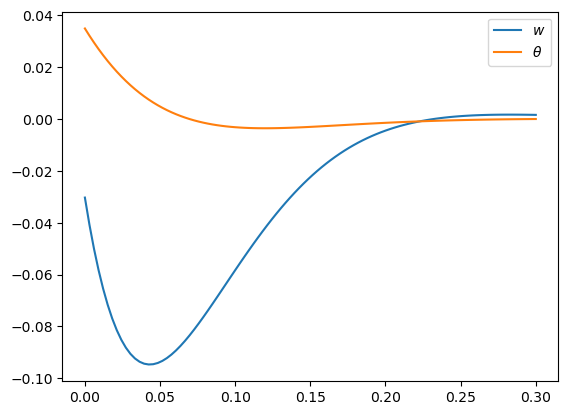

In [45]:
# Now we plot the state variables
plt.plot(time, states[2], label='$w$')
plt.plot(time, states[3], label='$\\theta$')
plt.legend()
plt.show()

### 2.2 Phugoid Mode

The Phugoid mode is a fundamental longitudinal mode of an aircraft that typically presents as a long-period oscillation. It is characterized by coupled variations in altitude and speed but with little change in the aircraft's pitch angle. This mode involves the exchange of kinetic and potential energy — similar to a roller coaster going up and down gentle hills.

**Understanding the Phugoid Mode Dynamics** <br>
The Phugoid mode dynamics can be observed in the state variables:
- **Forward Speed $u$:** <br>
    Represents the aircraft's speed in the direction of the longitudinal axis. In the Phugoid mode, this will oscillate as the aircraft gains and loses speed during the ascent and descent phases.

- **Pitch Angle $\theta$:** <br>
    Changes in pitch angle are usually small and gradual in the Phugoid mode. This state variable helps us understand how the aircraft's orientation varies over time, with a slow exchange between kinetic and potential energy.

**Initial Conditions for Phugoid Mode** <br>
The initial conditions for the Phugoid mode are set based on the eigenvector corresponding to the Phugoid eigenvalues. These initial conditions reflect a disturbance that excites the Phugoid mode without significantly affecting other modes.

In [46]:
# Here we choose the real part of the third eigenvector as the initial condition
x0_phugoid = np.real(eigenvectors[:, 2])
print(x0_phugoid)

[ 0.297  0.939 -0.007 -0.019]


The step response of the system with initial conditions $x_{0,\text{phugoid}}$ simulates how the aircraft will behave over time when the Phugoid mode is excited. The plot shows the oscillatory nature of $u$ and $\theta$, with $u$ depicting the energy exchange in the system and $\theta$ showing slight variations corresponding to the changes in altitude and velocity.

These two states oscilate with a phase change of nearly $\pi/2$ or $90\degree$ to one another as seen in the lecture. This coresponds to a sine-cosine behavior.
- **Maximum Slope of $\theta$:** (green dashed line) <br>
    $\theta$ has maximum slope and $u$ nearly at a point with slope zero.
- **Zero Slope of $\theta$:** (red dashed line) <br>
    Here $\theta$ has a slope of zero and we see that $u$ is nearly at it's point with maximum slope.

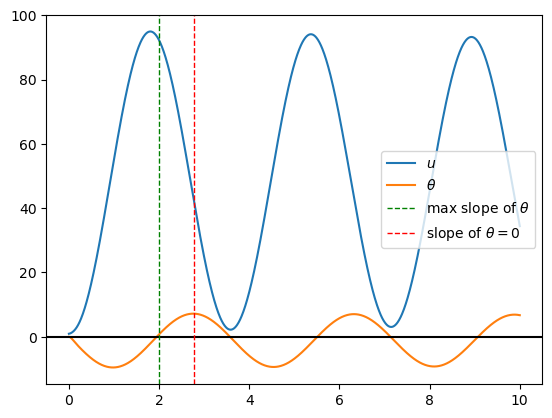

In [47]:
# Compute the step response with initial conditions x0
response = ct.step_response(sys, T=10, X0=x0)
states = response.states # extract the state variables
time = response.time # extract the time vector

# Plot the state variables
plt.plot(time, states[1], label='$u$')
plt.plot(time, states[3], label='$\\theta$')

# Add vertical and horizontal lines
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=2, color='g', linestyle='--', label='max slope of $\\theta$', linewidth=1)
plt.axvline(x=2.77, color='r', linestyle='--', label='slope of $\\theta = 0$', linewidth=1)

plt.legend()
plt.show()

To see that the oscilations of these two states are actually damped we need to simulate the response for a longer time. Here we choose a simulation time of $T=1000s$ and can observe that the states are stable and eventually converge to zero. This shows the difference of the speed of the short period and phugoid. The phugoid is much slower, i.e. it need much more time to converge than for the short period.

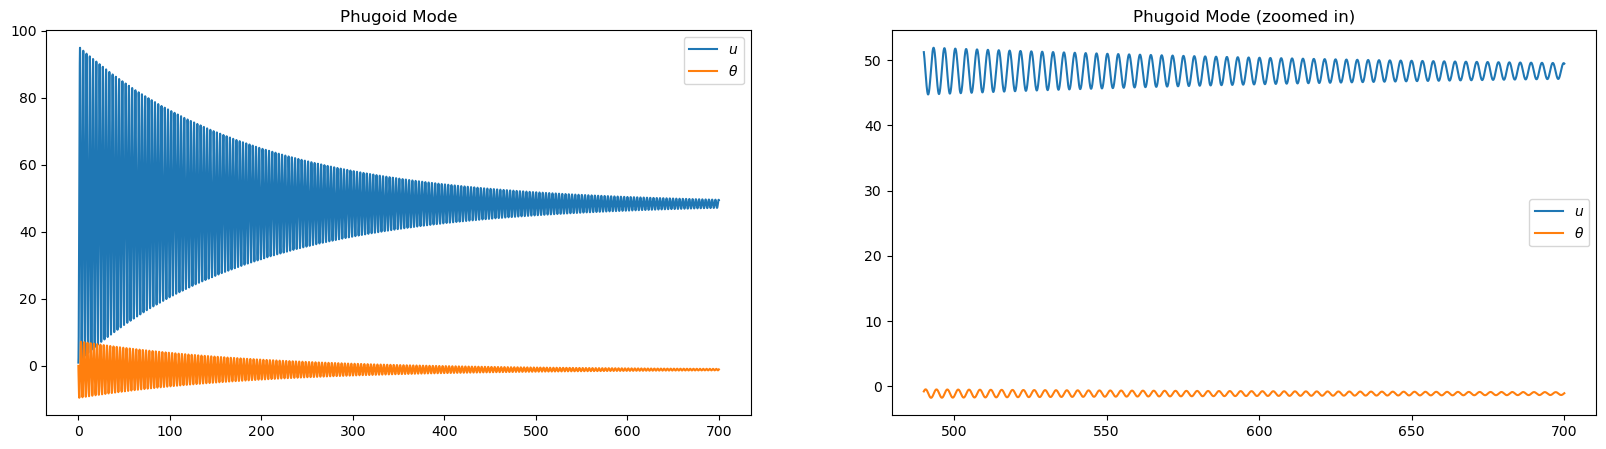

In [48]:
# Define the time vector
t = np.linspace(0, 700, 10000)  # 1000 seconds, 1000 points

# Compute the step response with initial conditions x0
response = ct.step_response(sys, t, x0)

# Extract the state variables and time vector from the response
states = response.states
time = response.time

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Plot the state variables in the first subplot
ax1.plot(time, states[1], label='$u$')
ax1.plot(time, states[3], label='$\\theta$')
ax1.set_title('Phugoid Mode')
ax1.legend()

# Plot the state variables in the second subplot (zoomed in)
ax2.plot(time[7000:], states[1, 7000:], label='$u$')
ax2.plot(time[7000:], states[3, 7000:], label='$\\theta$')
ax2.set_title('Phugoid Mode (zoomed in)')
ax2.legend()

# Display the figure
plt.show()

## Exercise 3: Controllability and Observability

In the last part of this notebook we want to show if the aircraft model is controllable (reachable) and/or observable. This is important if our model does not behave as we want to and we need to design a controller. To understand how we can change the behavior of the states trough our inputs, we need to asses the controllability and observability of our system.

Recall that in the lecture 2 the __reachability matrix__ $\mathcal{R}$ and the __observability matrix__ $\mathcal{O}$ were introduced:

$$
\mathcal{R} =
\begin{bmatrix} B & AB & A^2B & ... & A^{n-1}B \end{bmatrix},
\qquad
\mathcal{O} = \begin{bmatrix} C \\ CA \\ \vdots \\ CA^{n-1} \end{bmatrix}
$$

The system is fully controllable or observable if $rank(\mathcal{R}) = n$ or $rank(\mathcal{O}) = n$ respectively.


Try to implement the functions below that check if the system is controllable or observable.

Hints:
- use `A.shape[0]` to get the number of states $n$.
- use `np.linalg.matrix_power(M, i)` to calculate the matrix power $M^i$.
- use `M = np.hstack(M, v)` to append a columnvector $v$ to the matrix $M$.

In [49]:
def check_controllability(A: np.array, B: np.array) -> None:
    """
    Check the controllability of a system given the state-space representation.

    Parameters:
    A (np.array): The state matrix.
    B (np.array): The input matrix.

    Returns:
    None
    """
    
    # TODO: Get the number of columns in matrix A.
    n = None
    
    # TODO: Initialize the reachability matrix R with matrix B, since the first column of R is always B.
    R = None
    
    # Use a for loop to compute each column of the reachability matrix and append it to R.
    for i in range(1, n):  # Iterate from 1 to n-1.
        # TODO: Compute the i-th column of the reachability matrix and concatenate it horizontally to R.
        R = None
        
    # TODO: Compute the rank of the reachability matrix.
    rank = None
    
    if rank == A.shape[0]:
        print(f"The system is controllable with rank {rank}.")
    else:
        print(f"The system is not controllable with rank {rank}.")

In [168]:
def sol_check_controllability(A: np.array, B: np.array) -> None:
    """
    Check the controllability of a system given the state-space representation.

    Parameters:
    A (np.array): The state matrix.
    B (np.array): The input matrix.

    Returns:
    None
    """
    
    n = A.shape[0]  # Get the number of rows in matrix A.
    R = B  # Initialize the reachability matrix R with matrix B, since the first column of R is always B.
    
    for i in range(1, n):  # Iterate from 1 to n-1.
        # Calculate the reachability matrix for each power of A and concatenate it horizontally to R.
        R = np.hstack((R, np.linalg.matrix_power(A, i) @ B))
    
    rank = np.linalg.matrix_rank(controllability_matrix)
    if rank == A.shape[0]:
        print(f"The system is controllable with rank {rank}.")
    else:
        print(f"The system is not controllable with rank {rank}.")

In [ ]:
def check_observability(A: np.array, C: np.array) -> None:
    """
    Check the observability of a system given the state-space representation.

    Parameters:
    A (np.array): The state matrix.
    C (np.array): The output matrix.

    Returns:
    None
    """
    
    n = None  # Get the number of rows in matrix A.
    O = None  # Initialize the observability matrix O with matrix C, since the first row of O is always C.
    
    for i in range(1, n):  # Iterate from 1 to n-1.
        # Calculate the observability matrix for each power of A and concatenate it vertically to O.
        pass
    
    rank = np.linalg.matrix_rank(O)
    if rank == A.shape[0]:
        print(f"The system is observable with rank {rank}.")
    else:
        print(f"The system is not observable with rank {rank}.")

In [189]:
def sol_check_observability(A: np.array, C: np.array) -> None:
    """
    Check the observability of a system given the state-space representation.

    Parameters:
    A (np.array): The state matrix.
    C (np.array): The output matrix.

    Returns:
    None
    """
    
    n = A.shape[0]  # Get the number of rows in matrix A.
    O = C  # Initialize the observability matrix O with matrix C, since the first row of O is always C.
    
    for i in range(1, n):  # Iterate from 1 to n-1.
        # Calculate the observability matrix for each power of A and concatenate it vertically to O.
        O = np.vstack((O, C @ np.linalg.matrix_power(A, i)))
    
    rank = np.linalg.matrix_rank(O)
    if rank == A.shape[0]:
        print(f"The system is observable with rank {rank}.")
    else:
        print(f"The system is not observable with rank {rank}.")


#### __Additional Information__

the `control` module has the functions `ct.ctrb(A, B)` and `ct.obsv(A, C)` that compute the reachability and observability matrices directly.

Example:

In [50]:
# Compute the controllability matrix R using the ctrb() function from the control module
R = ct.ctrb(A, B)

# Calculate the rank of the controllability matrix R using the matrix_rank() function from numpy
rank_R = np.linalg.matrix_rank(R)

# Compute the observability matrix O using the obsv() function from the control module
O = ct.obsv(A, C)

# Calculate the rank of the observability matrix O using the matrix_rank() function from numpy
rank_O = np.linalg.matrix_rank(O)

# Print the controllability matrix R, observability matrix O, and their respective ranks
print("Controllability matrix R = \n", R)
print("Observability matrix O = \n", O)
print("Rank of controllability matrix R = ", rank_R)
print("Rank of observability matrix O = ", rank_O)

Controllability matrix R = 
 [[    -421.2       7241.611   -52284.375 -1520898.708]
 [       1.323      180.555    -3321.973    97662.75 ]
 [     -17.381    -1541.493    59909.992 -1318333.425]
 [       0.        -420.105     7222.783   -52148.436]]
Observability matrix O = 
 [[   0.       0.       0.       1.   ]
 [   0.997    0.       0.       0.   ]
 [ -15.54     4.7    -38.621    0.   ]
 [  69.533  -14.116 1314.194  -18.783]]
Rank of controllability matrix R =  4
Rank of observability matrix O =  4
